###### Import packages and csv tables

In [1]:
import pandas as pd
import altair as alt
from altair import *
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

sns.set_style("white")
%matplotlib inline

In [2]:
df = pd.read_csv('data_clean.csv', index_col=0)
df_bp = pd.read_pickle("Booking_price_comparison.pkl")
df_air = pd.read_pickle("2017_airbnb_api_data_clean.pkl")

In [3]:
#Transformatin of df. area
df = df.replace("Hessenwinkel", "Treptow-Köpenick")
#rename columns
df.columns=["name", "area", "price"]
df_bp.columns = ["name", "price", "street", "area", "zip"]
df.head(2)

,name,area,price
0,AZIMUT Hotel City South Berlin,Neukölln,117
1,Adele Designhotel,Pankow,144


In [4]:
df_bp.head(2)

,name,price,street,area,zip
0,City Hotel am Gendarmenmarkt,107,Leipziger Str. 65,Mitte,"10117 Berlin, Germany"
4,mk hotel berlin,91,Osloer Straße 100,Mitte,"13359 Berlin, Germany"


In [5]:
df_air.head(2)

,name,price,area,source
0,10103806,40,Neukölln,airbnb
1,16187267,40,Neukölln,airbnb


In [6]:
# to measure the density of hotels per area, we only need the hotel and the area columns
df_bp = df_bp.drop([ "street", "zip"], axis=1)

##### Merge all the tables 

In [7]:
merged = df.append(df_bp, ignore_index=True, sort=True)

In [8]:
#Create Column that indicates source
merged["source"] = "hotel"
merged.head(2)

,area,name,price,source
0,Neukölln,AZIMUT Hotel City South Berlin,117,hotel
1,Pankow,Adele Designhotel,144,hotel


In [9]:
merged.head(2)

,area,name,price,source
0,Neukölln,AZIMUT Hotel City South Berlin,117,hotel
1,Pankow,Adele Designhotel,144,hotel


In [10]:
merged_all = merged.append(df_air, ignore_index=True, sort = True)

In [11]:
merged_all

,area,name,price,source
0,Neukölln,AZIMUT Hotel City South Berlin,117,hotel
1,Pankow,Adele Designhotel,144,hotel
2,Mitte,Adina Apartment Hotel Berlin CheckPoint Charlie,229,hotel
3,Berlin,All In Hostel / Hotel Berlin,26,hotel
4,Charlottenburg-Wilmersdorf,Amc Apartments Ku Damm,293,hotel
...,...,...,...,...
10372,Friedrichshain-Kreuzberg,3701258,29,airbnb
10373,Friedrichshain-Kreuzberg,5009958,44,airbnb
10374,Friedrichshain-Kreuzberg,8284795,31,airbnb
10375,Friedrichshain-Kreuzberg,16279286,61,airbnb


##### Transformations

In [12]:
merged_all.area.unique()

array(['Neukölln', 'Pankow', 'Mitte', 'Berlin',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Lichtenberg',
       'Treptow-Köpenick', ' Mitte', ' Charlottenburg-Wilmersdorf',
       ' Friedrichshain-Kreuzberg', ' Tempelhof-Schöneberg',
       ' Reinickendorf', ' Lichtenberg', ' Prenzlauer Berg', ' Neukölln',
       ' Treptow-Köpenick', ' Steglitz-Zehlendorf', ' 80-82', ' Spandau',
       ' Pankow', ' Marzahn-Hellersdorf', ' 10787 Berlin',
       'Friedrichshain-Kreuzberg', 'Charlottenburg-Wilm.',
       'Marzahn - Hellersdorf', 'Reinickendorf', 'Steglitz - Zehlendorf',
       'Tempelhof - Schöneberg', 'Treptow - Köpenick'], dtype=object)

In [13]:
# get rid of the € signs in price
#merged_data_full.price.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [14]:
#we have 24 duplicates
merged_all["name"].value_counts()

IBB Blue Hotel Adlershof Berlin-Airport    2
Adele Designhotel                          2
OYO Hotel Bohemia                          2
Angleterre Hotel                           2
Schlosshotel Berlin by Patrick Hellmann    2
                                          ..
1270952                                    1
16008419                                   1
8709500                                    1
16550598                                   1
6474866                                    1
Name: name, Length: 10353, dtype: int64

In [15]:
#drop duplicates
merged_all["name"] = merged_all["name"].drop_duplicates()

In [16]:
merged_all["name"].value_counts()

6632700                      1
3520435                      1
3998322                      1
Lulu Guldsmeden              1
14618706                     1
                            ..
Hotel Jurine Berlin Mitte    1
1270952                      1
16008419                     1
8709500                      1
6474866                      1
Name: name, Length: 10353, dtype: int64

##### Inspect Data Types

In [17]:
merged_all.dtypes

area      object
name      object
price     object
source    object
dtype: object

In [18]:
merged_all.area.unique()

array(['Neukölln', 'Pankow', 'Mitte', 'Berlin',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Lichtenberg',
       'Treptow-Köpenick', ' Mitte', ' Charlottenburg-Wilmersdorf',
       ' Friedrichshain-Kreuzberg', ' Tempelhof-Schöneberg',
       ' Reinickendorf', ' Lichtenberg', ' Prenzlauer Berg', ' Neukölln',
       ' Treptow-Köpenick', ' Steglitz-Zehlendorf', ' 80-82', ' Spandau',
       ' Pankow', ' Marzahn-Hellersdorf', ' 10787 Berlin',
       'Friedrichshain-Kreuzberg', 'Charlottenburg-Wilm.',
       'Marzahn - Hellersdorf', 'Reinickendorf', 'Steglitz - Zehlendorf',
       'Tempelhof - Schöneberg', 'Treptow - Köpenick'], dtype=object)

In [19]:
#remove spacing in the fromt of area name
merged_all.area = merged_all.area.str.lstrip()

In [20]:
#remove weird area data and rename area Berlin to unknown
merged_all.area = merged_all.area.replace("Berlin", "unknown")
merged_all.area = merged_all.area.replace("80-82", "unknown")
merged_all.area = merged_all.area.replace("10787 Berlin", "Tempelhof-Schöneberg")
merged_all.area = merged_all.area.replace("Charlottenburg-Wilm.", "Charlottenburg-Wilmersdorf")
merged_all.area = merged_all.area.replace("Marzahn - Hellersdorf", "Marzahn-Hellersdorf")
merged_all.area = merged_all.area.replace("Steglitz - Zehlendorf", "Steglitz-Zehlendorf")
merged_all.area = merged_all.area.replace("Tempelhof - Schöneberg", "Tempelhof-Schöneberg")
merged_all.area = merged_all.area.replace("Treptow - Köpenick", "Treptow-Köpenick")
merged_all.area = merged_all.area.replace("Prenzlauer Berg", "Pankow")

In [21]:
merged_all.area.unique()

array(['Neukölln', 'Pankow', 'Mitte', 'unknown',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Lichtenberg',
       'Treptow-Köpenick', 'Friedrichshain-Kreuzberg',
       'Tempelhof-Schöneberg', 'Reinickendorf', 'Steglitz-Zehlendorf',
       'Marzahn-Hellersdorf'], dtype=object)

In [22]:
# save price as int
merged_all["price"] = merged_all["price"].astype("int")

In [23]:
merged_all

,area,name,price,source
0,Neukölln,AZIMUT Hotel City South Berlin,117,hotel
1,Pankow,Adele Designhotel,144,hotel
2,Mitte,Adina Apartment Hotel Berlin CheckPoint Charlie,229,hotel
3,unknown,All In Hostel / Hotel Berlin,26,hotel
4,Charlottenburg-Wilmersdorf,Amc Apartments Ku Damm,293,hotel
...,...,...,...,...
10372,Friedrichshain-Kreuzberg,3701258,29,airbnb
10373,Friedrichshain-Kreuzberg,5009958,44,airbnb
10374,Friedrichshain-Kreuzberg,8284795,31,airbnb
10375,Friedrichshain-Kreuzberg,16279286,61,airbnb


##### Descriptive Statistics

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

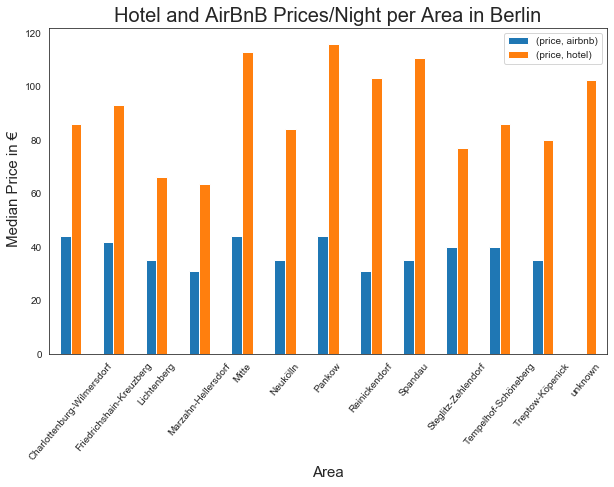

In [47]:
# Price comparison between hotels and air bnb
price_chart = merged_all.groupby(["area", "source"]).median().unstack().plot(figsize=(10,6),kind="bar");
price_chart;
plt.legend();
plt.xlabel("Area", size = 15);
plt.ylabel(" Median Price in €", size = 15);
plt.title("Hotel and AirBnB Prices/Night per Area in Berlin", size = 20);
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

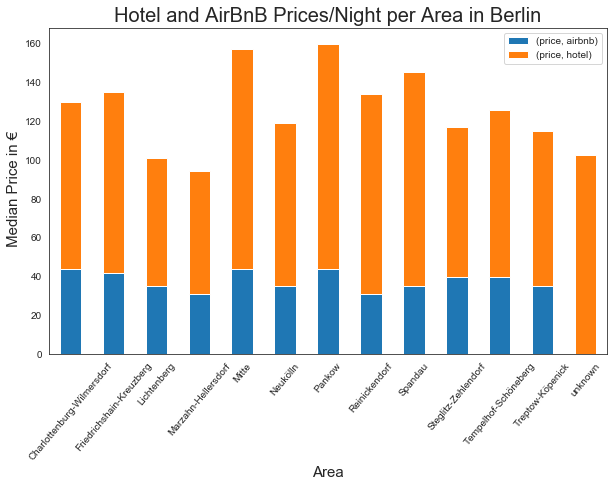

In [48]:
# here we can clearly see the difference in price
merged_all.groupby(["area", "source"]).median().unstack().plot.bar(figsize=(10,6),stacked=True)
plt.legend();
plt.xlabel("Area", size = 15);
plt.ylabel(" Median Price in €", size = 15);
plt.title("Hotel and AirBnB Prices/Night per Area in Berlin", size = 20);
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

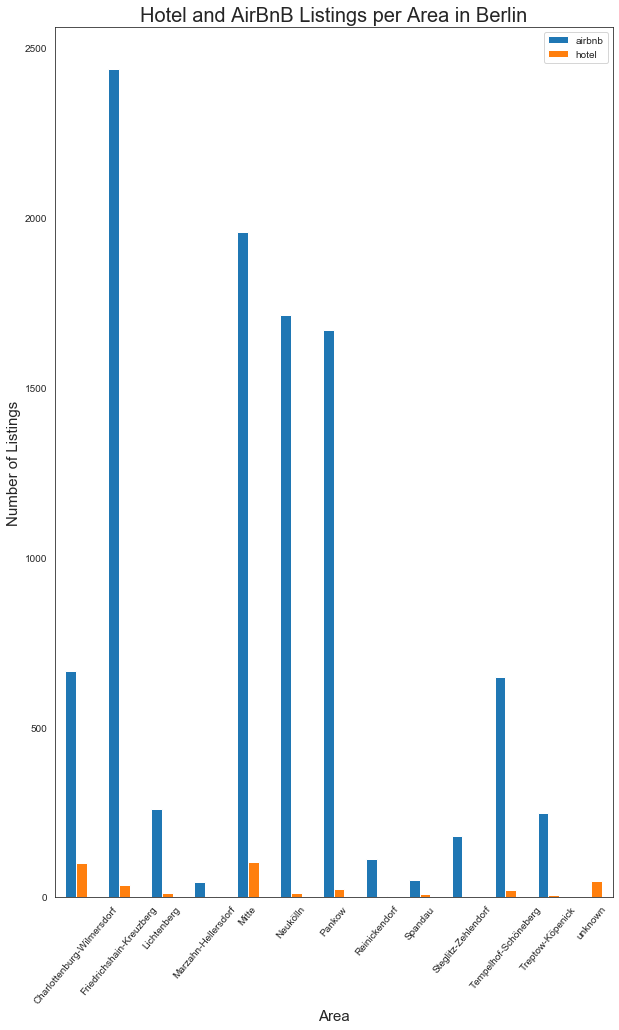

In [141]:



# comparison between hotels and air bnb number of listings
density_chart = merged_all.sort_values(["area", "source"]).reset_index(drop=True).groupby(["area", "source"]).size().unstack().plot(figsize=(10,16),kind="bar");
density_chart;
plt.legend();
plt.xlabel("Area", size = 15);
plt.ylabel("Number of Listings", size = 15);
plt.title("Hotel and AirBnB Listings per Area in Berlin", size = 20);
plt.xticks(rotation=50)

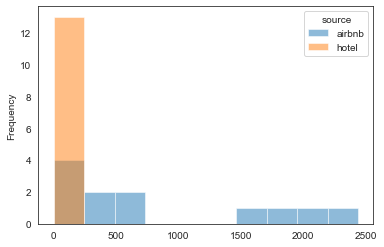

In [27]:
# hstogram is no use to us here 
merged_all.sort_values(["area", "source"]).reset_index(drop=True).groupby(["area", "source"]).size().unstack().plot.hist(alpha=0.5);

In [28]:
#merged_data_full.boxplot(column="price")

#we have outliers - might consider a drop of the one thats 600+ per night

In [29]:
#merged_all

In [30]:
# number of hotels and air bnb's per area
#n = merged_all.groupby(["area","source"]).size()
#n

In [31]:
#n.agg("n.size()").reset_index().plot(kind="bar");

In [32]:
#chart = Chart(merged_all).mark_bar().encode(column=Column("source"), x=X("area"), y=Y("name"), color=Color("source", scale=Scale(range=['#EA98D2', '#659CCA']))).configure_facet_cell(strokeWidth=0.0,)

#chart.display()

In [33]:
#merged_data_full['area'].value_counts().plot.bar()

#merged_data_full[['area','source']].plot(kind='bar')

#most hotels are in Mitte & Charlottenburg 

In [34]:
#hotel_li=[merged_data_full[merged_data_full["source"] == "hotel"].count()]
#airbnb_li=[merged_data_full[merged_data_full["source"] == "airbnb"].count()]
#index_area = [merged_data_full["area"]]
#df_area = pd.DataFrame({'hotel': hotel_li, 'airbnb': airbnb_li}, index=index_area)
#ax = merged_data_full.plot.bar(rot=0)

In [35]:
#[merged_data_full[merged_data_full["source"] == "hotel"].groupby(["area"]).count()]

In [36]:
#hotel_li = (merged_data_full[["area","source"]]
#          .groupby(["area", "source"])
#          .agg({"source": ["count"]}))

#hotel_li

In [37]:
#hotel_li = []
#i = 0
#for merged_data_full['source'].iloc[i] in merged_data_full['source'] == "hotel":
#    (merged_data_full[["area","source"]]
#          .groupby(["area", "source"])
 #         .agg({("source"): ["count"]}))
  #  hotel_li.append(merged_data_full['source'].iloc[i])
   # i +=1
#
#hotel_li

In [38]:
#[merged_data_full[merged_data_full["source"] == "hotel"].groupby("area").count()]

##### Create aggregate Dataset for plotting 

In [39]:
#df_agg = (merged_data_full[["area", "price", "source"]]
 #         .groupby(["area", "source"])
  #        .agg({"price": ["median", "count"]}))
#
#df_agg = (df_agg
#          .reset_index())
#df_agg.head()

##### remove weird indexes

In [40]:
#df_agg.columns

In [41]:
#list(df_agg.columns.to_flat_index())

In [42]:
#[first+second for first, second in df_agg.columns]

In [43]:
#df_agg.columns = [first+second for first, second in df_agg.columns.to_flat_index()]

In [44]:
#df_agg = df_agg.rename(columns={"pricemedian": "median_price",
#                                "pricecount": "counts"})

In [45]:
#df_agg.dtypes

In [46]:
#(df_agg
# .groupby("area", "source")
# .agg({"median_price": "sum"})).plot(kind="bar", color="red");

In [140]:
#Density of airBnb by Area

count = [merged_all.groupby(["area" , "source"])["name"].count()]
hotel_density = []
airbnb_density = []
for number in "count": 
    if ["source"]=="hotel":
        print((number/386)*100)
        hotel_density.append(number)
    elif ["source"]=="airbnb":
        print((number/9991)*100)
        airbnb_density.append(number)

is hotel = 
        

[]

In [116]:
(10/386)

0.025906735751295335

In [127]:
count = list(count) if "source"=="hotel"
count

SyntaxError: invalid syntax (<ipython-input-127-db0ed6aa2fe2>, line 1)